In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress


In [2]:
#import csv file
# kynan add dempgraphic file
data_path2 = "Food_Inspections.csv"
request_data2 =pd.read_csv(data_path2)
demo_path = "Demographics.csv"
demo_request = pd.read_csv(demo_path)

In [3]:
# Kynan rename df to align with Ioana's code
data = request_data2 

In [4]:
#look at the number or rows and columns in the dataset
print(data.shape)

(208254, 17)


In [5]:
#check if there are any null values
data.isnull().values.any()

True

In [6]:
#view all the columns that have null values
null_columns=data.columns[data.isnull().any()]
data[null_columns].isnull().sum()

AKA Name            2479
License #             17
Facility Type       4861
Risk                  73
City                 150
State                 48
Zip                   50
Inspection Type        1
Violations         55325
Latitude             688
Longitude            688
Location             688
dtype: int64

In [7]:
#look at specific column that have nulls
print(data[data["License #"].isnull()][null_columns])

                               AKA Name  License #  \
4483               ST. DEMETRIOS CHURCH        NaN   
4641               ST. DEMETRIOS CHURCH        NaN   
34562   GOD'S BATTLE AXE PRAYER ACADEMY        NaN   
45604              ST. DEMETRIOS CHURCH        NaN   
60700          OLD ST. PATRICK'S CHURCH        NaN   
94116          OLD ST. PATRICK'S CHURCH        NaN   
96001              ST. DEMETRIOS CHURCH        NaN   
96068                               NaN        NaN   
99050   GOD'S BATTLE AXE PRAYER ACADEMY        NaN   
114901                              NaN        NaN   
122683             ST. DEMETRIOS CHURCH        NaN   
124533             ST. DEMETRIOS CHURCH        NaN   
132290             ST. DEMETRIOS CHURCH        NaN   
184529             ST. DEMETRIOS CHURCH        NaN   
194554             ST. DEMETRIOS CHURCH        NaN   
196808  GOD'S BATTLE AXE PRAYER ACADEMY        NaN   
196948                  ARGENTINA FOODS        NaN   

                      Facil

In [8]:
#check how many different restaurnt types are classified under "Facility Type"
restaurant_types = data['Facility Type'].value_counts()
restaurant_types.head(56)

Restaurant                           138590
Grocery Store                         27156
School                                12823
Children's Services Facility           3396
Bakery                                 3046
Daycare (2 - 6 Years)                  2767
Daycare Above and Under 2 Years        2550
Long Term Care                         1422
Catering                               1255
Liquor                                  913
Mobile Food Dispenser                   877
Daycare Combo 1586                      747
Mobile Food Preparer                    667
Golden Diner                            597
Hospital                                580
Wholesale                               542
TAVERN                                  300
Daycare (Under 2 Years)                 265
Special Event                           223
Shared Kitchen User (Long Term)         205
BANQUET HALL                            161
GAS STATION                             140
Shared Kitchen                  

In [9]:
# filter the dataset by facility type =restaurant and look at its shape

restaurant_data = data[data['Facility Type']== "Restaurant"]
print(restaurant_data.shape)

(138590, 17)


In [10]:
restaurant_data.head()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
1,1561742,LE CAFE,LE CAFE,2178017.0,Restaurant,Risk 1 (High),4655 N LINCOLN AVE,CHICAGO,IL,60625.0,7/31/2015,Recent Inspection,Pass w/ Conditions,21. * CERTIFIED FOOD MANAGER ON SITE WHEN POTE...,41.966413,-87.686937,"(41.96641308847062, -87.68693718914149)"
3,335329,J & J FISH,J & J FISH,69148.0,Restaurant,Risk 2 (Medium),1945 E 79TH ST,CHICAGO,IL,60649.0,10/7/2010,Canvass,Pass,32. FOOD AND NON-FOOD CONTACT SURFACES PROPERL...,41.751489,-87.576634,"(41.75148901882857, -87.57663364715819)"
4,1389412,ROYAL CHICKEN,NaN,2289533.0,Restaurant,Risk 2 (Medium),5254 W CHICAGO AVE,CHICAGO,IL,60651.0,4/9/2014,License Re-Inspection,Pass,NaN,41.895023,-87.757835,"(41.89502331496054, -87.75783480830066)"
6,1096394,JIMMY GREEN'S,JIMMY GREEN'S,1979963.0,Restaurant,Risk 1 (High),825 S STATE ST,CHICAGO,IL,60605.0,7/24/2012,Canvass,Out of Business,NaN,41.871464,-87.627369,"(41.87146433662049, -87.62736908629603)"
7,2135370,CONRAD CHICAGO,BAPTISTE & BOTTLE,2457427.0,Restaurant,Risk 1 (High),101 E ERIE ST,CHICAGO,IL,60611.0,1/12/2018,Canvass,Pass w/ Conditions,3. POTENTIALLY HAZARDOUS FOOD MEETS TEMPERATUR...,41.894010,-87.625368,"(41.89400968711272, -87.62536771830537)"


In [11]:
# we want to keep just the restaurants where we know the location, so we keep just the rows where location is not NaN:
restaurants_df = restaurant_data[restaurant_data['Location'].notna()]
restaurants_df.head()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
1,1561742,LE CAFE,LE CAFE,2178017.0,Restaurant,Risk 1 (High),4655 N LINCOLN AVE,CHICAGO,IL,60625.0,7/31/2015,Recent Inspection,Pass w/ Conditions,21. * CERTIFIED FOOD MANAGER ON SITE WHEN POTE...,41.966413,-87.686937,"(41.96641308847062, -87.68693718914149)"
3,335329,J & J FISH,J & J FISH,69148.0,Restaurant,Risk 2 (Medium),1945 E 79TH ST,CHICAGO,IL,60649.0,10/7/2010,Canvass,Pass,32. FOOD AND NON-FOOD CONTACT SURFACES PROPERL...,41.751489,-87.576634,"(41.75148901882857, -87.57663364715819)"
4,1389412,ROYAL CHICKEN,NaN,2289533.0,Restaurant,Risk 2 (Medium),5254 W CHICAGO AVE,CHICAGO,IL,60651.0,4/9/2014,License Re-Inspection,Pass,NaN,41.895023,-87.757835,"(41.89502331496054, -87.75783480830066)"
6,1096394,JIMMY GREEN'S,JIMMY GREEN'S,1979963.0,Restaurant,Risk 1 (High),825 S STATE ST,CHICAGO,IL,60605.0,7/24/2012,Canvass,Out of Business,NaN,41.871464,-87.627369,"(41.87146433662049, -87.62736908629603)"
7,2135370,CONRAD CHICAGO,BAPTISTE & BOTTLE,2457427.0,Restaurant,Risk 1 (High),101 E ERIE ST,CHICAGO,IL,60611.0,1/12/2018,Canvass,Pass w/ Conditions,3. POTENTIALLY HAZARDOUS FOOD MEETS TEMPERATUR...,41.894010,-87.625368,"(41.89400968711272, -87.62536771830537)"


In [12]:
#find out how many unique zip codes we have in our dataset:
len(restaurants_df['Zip'].unique().tolist())

60

In [13]:
#double-check there are no more null values in the "location" column
null_columns=restaurants_df.columns[restaurants_df.isnull().any()]
data[null_columns].isnull().sum()

AKA Name            2479
Risk                  73
City                 150
State                 48
Zip                   50
Inspection Type        1
Violations         55325
dtype: int64

In [14]:
# Export the restaurants data into a csv. i've comment this out because I don't want to save the file multiple times on my machine
#restaurants_df.to_csv("Restaurants.csv")

In [15]:
#look at how many unique restaurants, based on location
len(restaurants_df['Location'].unique().tolist())

9523

In [163]:
# eliminate restaurants that are "out of business" or "business not located"
clean_data = restaurants_df[(restaurants_df["Results"] != "Out of Business") & (restaurants_df["Results"] != "Business Not Located")]
#Kynan isolate complaint inspections and canvas inspections
complaint_data = clean_data[clean_data["Inspection Type"]== "Complaint"]
canvass_data = clean_data[clean_data["Inspection Type"]== "Canvass"]

In [186]:
#Kynan look at inspection pass fail rates by inspection type
complaint_consequence = complaint_data["Results"]
canvass_consequence = canvass_data["Results"]
complaint_consequence.value_counts()
com_consequences = ["Pass", "Fail", "Pass w/Conditions", "No Entry", " "]
canvass_consequence.value_counts()
can_consequences = ["Pass", "Pass w/Conditions",  "Fail","No Entry", " "]
complaint_consequence.value_counts()

Pass                  6190
Fail                  4580
Pass w/ Conditions    3273
No Entry               660
Not Ready               12
Name: Results, dtype: int64

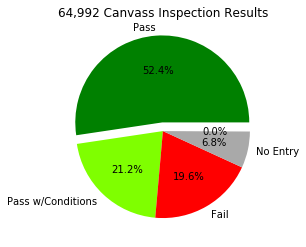

In [187]:
#Kynan visualize Inspection results for Canvass Inspections
colors_can = ["green", "Chartreuse", "red", "darkgrey", "white"]
explode = (0.1,0,0,0,0)
plt.pie(canvass_consequence.value_counts(), labels = can_consequences, autopct="%1.1f%%", colors = colors_can, explode = explode)
plt.title("64,992 Canvass Inspection Results")
plt.savefig("Canvass Inspection Results")


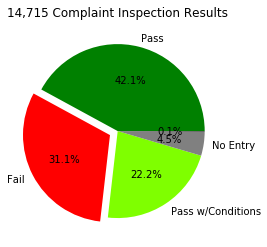

In [188]:
#Kynan visualize inspection results for 
colors_com = ["green", "red","Chartreuse", "grey", "black"]
explode = (0,0.1,0,0,0)
plt.pie(complaint_consequence.value_counts(), labels = com_consequences, autopct="%1.1f%%", colors = colors_com, explode = explode)
plt.title("14,715 Complaint Inspection Results")
plt.savefig("Complaint Inspection Results")

In [20]:
#Kynan look at complaint and canvas inspections by zip code
complaint_zip_count = complaint_data["Zip"].value_counts()
canvass_zip_count = canvass_data["Zip"].value_counts()
complaint_zip_count = complaint_zip_count.sort_index()
canvass_zip_count = canvass_zip_count.sort_index()

In [21]:
# Kynan create variables for total canvass inspections and total complaint inspections
canvass_sum = canvass_zip_count.sum()
complaint_sum = complaint_zip_count.sum()




In [22]:
#Kynan calculate relative distribution of canvas and complaint based inspections per zip code
complaint_percent = []
canvass_percent = []
for complaint in complaint_zip_count:
    complaint_percent.append((complaint/complaint_sum)*100)

for canvass in canvass_zip_count:
    canvass_percent.append(canvass/canvass_sum*100)

# add null value to complaint percent
complaint_percent.append(0)
# format to percent 
#complaint_percent = ['{:.2f}%'.format(elem) for elem in complaint_percent]
#canvass_percent =  ['{:.2f}%'.format(elem) for elem in canvass_percent]
#canvass_percent = canvass_percent.astype(float)
#round complaint zip count
#complaint_zip_count = ['{:f}'.format(elem) for elem in complaint_zip_count]




In [23]:
#Kynan combine complaint and canvass data into new df add zip code 
relative_inspection_types = pd.DataFrame({"Canvass Raw": canvass_zip_count, "Complaint Raw": complaint_zip_count, 
                                          "Canvass Percent": canvass_percent,
                                          "Complaint Percent": complaint_percent})
zips = relative_inspection_types.index
zips.astype(int)

relative_inspection_types["Zip"] = zips

In [24]:
# Kynan calculate which zip codes get a disproportional share of complaint based inspections by calculating an expected number of complaints
relative_inspection_types["Expected Complaints"] = round(relative_inspection_types["Canvass Percent"]/100 * complaint_sum)
relative_inspection_types["Complaint Index"] = relative_inspection_types["Complaint Raw"]/relative_inspection_types["Expected Complaints"]*100

In [25]:
#Kynan add the differnece to df
relative_inspection_types = relative_inspection_types.sort_values(["Complaint Index"])


In [26]:
#Kynan calculate  chi square critical value 
import scipy.stats as stats
chi_square = pd.DataFrame([relative_inspection_types["Complaint Raw"], relative_inspection_types["Expected Complaints"]]).T
chi_square = chi_square.drop([60827.0], axis = 0)
critical_value = stats.chi2.ppf(q = 0.95, df = 57)
critical_value



75.62374846937608

In [27]:
#Kynan calcualte chi square value
stats.chisquare(chi_square['Complaint Raw'], chi_square['Expected Complaints'])


Power_divergenceResult(statistic=3615.674134905505, pvalue=0.0)

In [28]:
print("Since the chi square value of 3615 is larger than the critical value of 75, we conclude the results are statistically significant")

Since the chi square values of 3615 is larger than the critical value of 75, we conclude the results are statistically significant


In [149]:
#Kynan isolate and visualize the zips that have the most relative complaints
#too_many_complaints = relative_inspection_types.iloc[54:59, :]
#x_axis = (["Kenwood","Roseland","South Shore", "Auburn Gresham", "Chatham"])
#plt.bar(x_axis, too_many_complaints["Complaint Index"])



In [150]:
# Kynan add income and lat/long data
inspection_demo = pd.merge(relative_inspection_types, demo_request, on = "Zip")

In [151]:
len(inspection_demo)

54

In [152]:
#kynan convert income to float

inspection_demo.dtypes

Canvass Raw              int64
Complaint Raw          float64
Canvass Percent        float64
Complaint Percent      float64
Zip                    float64
Expected Complaints    float64
Complaint Index        float64
Location                object
Population             float64
Income                 float64
dtype: object

In [153]:
#Kynan review merged file.
inspection_demo.head()

,Canvass Raw,Complaint Raw,Canvass Percent,Complaint Percent,Zip,Expected Complaints,Complaint Index,Location,Population,Income
0,606,62.0,0.813619,0.419940,60631.0,120.0,51.666667,"41.994948, -87.813225",28832.0,55316.0
1,659,68.0,0.884778,0.460580,60646.0,131.0,51.908397,"41.992931, -87.760278",27016.0,58232.0
2,1933,202.0,2.595258,1.368193,60606.0,383.0,52.741514,"41.881988, -87.637329",NaN,100377.0
3,1711,205.0,2.297199,1.388513,60634.0,339.0,60.471976,"41.946189, -87.806117",74164.0,50042.0
4,336,42.0,0.451116,0.284476,60655.0,67.0,62.686567,"41.694722, -87.703687",29138.0,59849.0


In [154]:
#Kynan look at quartiles by income
inspection_demo["Income"].describe()

count        54.000000
mean      41787.481481
std       15768.665417
min       14205.000000
25%       31267.000000
50%       40124.000000
75%       50981.000000
max      100377.000000
Name: Income, dtype: float64

In [155]:
#Kynan create quartile bins based on income

bin_labels = ["$14K - $31K", "$31K - $40K", "$40K - $51K", "$51K - $100K"]
inspection_demo["Quartile"] = pd.qcut(inspection_demo["Income"], q=[0, .25, .5, .75, 1], labels = bin_labels)
#take a peek at data 
inspection_demo.head(10)
                  

,Canvass Raw,Complaint Raw,Canvass Percent,Complaint Percent,Zip,Expected Complaints,Complaint Index,Location,Population,Income,Quartile
0,606,62.0,0.813619,0.419940,60631.0,120.0,51.666667,"41.994948, -87.813225",28832.0,55316.0,$51K - $100K
1,659,68.0,0.884778,0.460580,60646.0,131.0,51.908397,"41.992931, -87.760278",27016.0,58232.0,$51K - $100K
2,1933,202.0,2.595258,1.368193,60606.0,383.0,52.741514,"41.881988, -87.637329",NaN,100377.0,$51K - $100K
3,1711,205.0,2.297199,1.388513,60634.0,339.0,60.471976,"41.946189, -87.806117",74164.0,50042.0,$40K - $51K
4,336,42.0,0.451116,0.284476,60655.0,67.0,62.686567,"41.694722, -87.703687",29138.0,59849.0,$51K - $100K
5,1597,213.0,2.144142,1.442698,60605.0,317.0,67.192429,"41.857651, -87.615592",12423.0,56151.0,$51K - $100K
6,1434,192.0,1.925297,1.300461,60661.0,284.0,67.605634,"41.882458, -87.643946",4382.0,54698.0,$51K - $100K
7,141,19.0,0.189307,0.128691,60633.0,28.0,67.857143,"41.661941, -87.557757",13262.0,40792.0,$40K - $51K
8,1238,168.0,1.662147,1.137903,60638.0,245.0,68.571429,"41.783650, -87.770407",55788.0,45173.0,$40K - $51K
9,1339,190.0,1.797750,1.286914,60623.0,265.0,71.698113,"41.847079, -87.719446",108144.0,28203.0,$14K - $31K


In [158]:
#Kynan create variables to build a visualization based on bins
x_axis = np.arange(len(bin_labels))
y_ax = inspection_demo.groupby(inspection_demo["Quartile"])
y_axis = round(y_ax["Complaint Raw"].sum()/y_ax["Expected Complaints"].sum()*100)





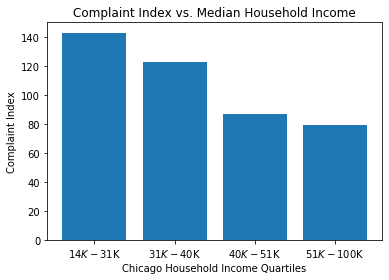

In [157]:
#Kynan create bin bar chart
plt.bar(x_axis, y_axis)
tick_locations = [0, 1, 2, 3]
plt.xticks(tick_locations, bin_labels)
plt.title("Complaint Index vs. Median Household Income")
plt.xlabel("Chicago Household Income Quartiles")
plt.ylabel("Complaint Index")
plt.show
plt.savefig("Income Quartiles vs. Complaint Index.png")

The correlation between both factors is -0.54


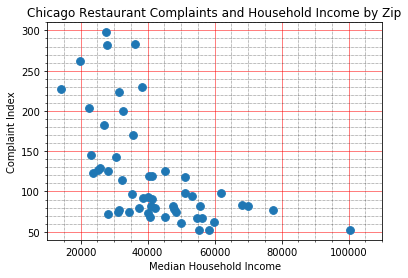

In [77]:
#Kynan Calculate and Visulize the correlation between restaurant complaint index and median household income per zip
income = inspection_demo["Income"]
complaints = inspection_demo["Complaint Index"]
correlation = st.pearsonr(income, complaints)
fig, ax = plt.subplots()
ax.set_axisbelow(True)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.scatter(income, complaints, marker = "o", s = 60)
plt.ylim(40, 310)
plt.xlim(10000, 110000)
plt.ylabel("Complaint Index")
plt.xlabel("Median Household Income")
ax.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title("Chicago Restaurant Complaints and Household Income by Zip")
plt.savefig("Income vs. Complaints.png")

In [46]:
#Kynancalculate zip codes where complaints inspections are greater than canvass
#x_axis = np.arange(len(relative_inspection_types))
#plt.bar(x_axis, relative_inspection_types['Canvass Percent'])
#tick_locations = [value for value in x_axis]
#plt.xticks(zips.all(), rotation = 'vertical')
#plt.yticks(np.arange(0, ,0.5),["0", ".5%", "1", "1.5%", "2%", "2.5%", "3%", "3.5%", "4%", "4.5%"])
#plt
#plt.ylim(0,5)
#plt.show

In [114]:
#find out how many unique restaurant locations we have in our dataset:
len(clean_data['Location'].unique().tolist())

NameError: name 'clean_data' is not defined

In [115]:
# Generate a bar plot showing the total number of restaurants for each Risk category 

#First, we use groupby "risk category" and count location to determine the data points
risk_data_points = clean_data.groupby(["Risk"]).count()["Location"]
risk_data_points

#Second, we plot the points
risk_data_points.plot(kind="bar", color="mediumvioletred", figsize=(12,7))

#Last, we set chart title and axis labels
plt.title("Total number of restaurants per Risk category")
plt.xlabel("Risk category")
plt.ylabel("Number of restaurants")

#show chart and set layout
plt.show()
plt.tight_layout()

NameError: name 'clean_data' is not defined

In [ ]:
#We can see that most restaurants are at high risk. We can also confirm this from the data:
clean_data['Risk'].value_counts()

In [ ]:
#Next, we look at the results of the inspections

#First, we use groupby "Results" and count location to determine the data points
risk_data_points = clean_data.groupby(["Results"]).count()["Location"]
risk_data_points

#Second, we plot the points
risk_data_points.plot(kind="bar", color="dodgerblue", figsize=(12,7))

#Last, we set chart title and axis labels
plt.title("Results of the inspection")
plt.xlabel("Results")
plt.ylabel("Location")

#show chart and set layout
plt.show()
plt.tight_layout()

In [ ]:
#confirm from the data:
clean_data['Results'].value_counts()